Notebook to show image classification using a locally running classigification server.

Simply 
* **pip3 install tensorflow**
* **pip3 install keras**

Follow https://github.com/jrosebr1/simple-keras-rest-api

Start the server by running **python run_keras_server.py**

Update 24/1/2019 - I've updated system Tensorflow since originally running this and there is an issue

In [1]:
ls

Keras rest API.ipynb       dog.jpg
Lesson 1.ipynb             ionosphere.csv
Lesson 11.ipynb            ionosphere.txt
bird.jpg*                  no_bird.jpg*
bird_2.jpg*                pima-indians-diabetes.csv
bird_3.jpg*                robin.jpg
data_text.txt


In [1]:
import pprint
import requests
import matplotlib.pyplot as plt
%matplotlib inline

# initialize the Keras REST API endpoint URL along with the input
# image path
KERAS_REST_API_URL = "http://localhost:5000/predict"

def print_json(json_data):
    pprint.PrettyPrinter().pprint(json_data)

# Helper functions

In [2]:
def make_predition(img_path):
    """Make a prediction via the API"""
    img = plt.imread(img_path)
    plt.imshow(img)

    image = open(img_path, "rb").read()
    payload = {"image": image}
    r = requests.post(KERAS_REST_API_URL, files=payload).json()

    if r["success"]:
        # loop over the predictions and display them
        for (i, result) in enumerate(r["predictions"]):
            print("{}. {}: {:.4f}".format(i + 1, result["label"],
                result["probability"]))
    return

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

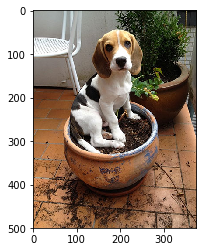

In [5]:
%%time
make_predition("dog.jpg")

1. hummingbird: 0.3425
2. wine_bottle: 0.0824
3. junco: 0.0649
4. beer_bottle: 0.0447
5. house_finch: 0.0394


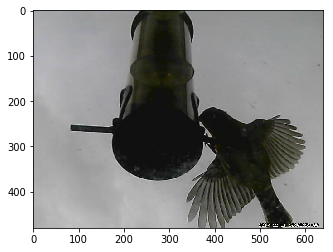

In [30]:
make_predition("bird.jpg")

1. rhinoceros_beetle: 0.3396
2. warplane: 0.1190
3. hook: 0.0458
4. wine_bottle: 0.0396
5. fig: 0.0285


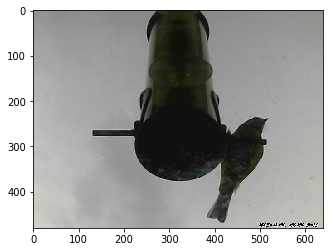

In [31]:
make_predition("bird_2.jpg")

1. rhinoceros_beetle: 0.3802
2. syringe: 0.1622
3. screwdriver: 0.1260
4. warplane: 0.0748
5. ground_beetle: 0.0493


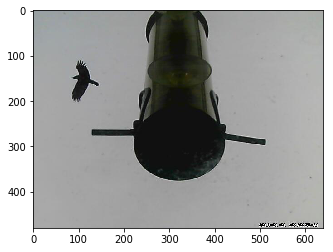

In [32]:
make_predition("bird_3.jpg")

1. syringe: 0.2570
2. screwdriver: 0.1237
3. warplane: 0.0946
4. rhinoceros_beetle: 0.0415
5. hook: 0.0334


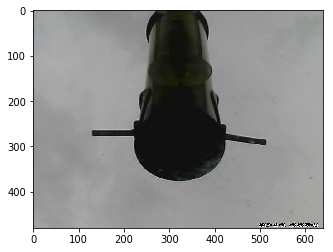

In [33]:
make_predition("no_bird.jpg")

1. bow_tie: 0.1465
2. suit: 0.1316
3. lab_coat: 0.0616
4. neck_brace: 0.0452
5. Windsor_tie: 0.0380
CPU times: user 92.3 ms, sys: 71.2 ms, total: 163 ms
Wall time: 510 ms


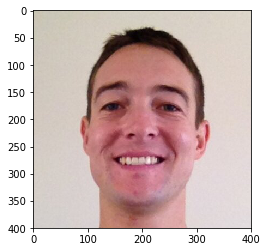

In [35]:
%%time
make_predition("robin.jpg")

# Class wrapper
Make a simple class for performing the classification

In [58]:
class Classification():
    """Perform a classification via the rest API."""

    ICON = 'mdi:file'

    def __init__(self, url, file_path):
        """Initialize the classification object."""
        self._url = url
        self._file_path = file_path   # Need to check its a valid path
        self._name = "Rest_classifier"
        self._state = None
        self._data = {}
        
    def process_image(self):
        """Perform image processing."""
        image = open(self._file_path, "rb").read()
        payload = {"image": image}
        response = requests.post(self._url, files=payload).json()
        if response["success"]:
            self._state = response['predictions'][0]['label']
            self._data = {e['label']:round(e['probability'],3) for e in response['predictions']}
        else:
            self._state = "Request failed"
            self._data = {}
        return

    @property
    def state(self):
        """Return the state of the entity."""
        return self._state
    
    @property
    def state_attributes(self):
        """Return device specific state attributes."""
        return self._data
    
    @property
    def icon(self):
        """Icon to use in the frontend, if any."""
        return self.ICON
    
    @property
    def name(self):
        """Return the name of the sensor."""
        return self._name

In [59]:
file_path = "dog.jpg"
my_classification = Classification(KERAS_REST_API_URL, file_path)

In [61]:
my_classification.name

'Rest_classifier'

In [62]:
my_classification.process_image()

In [63]:
my_classification.state

'beagle'

In [64]:
my_classification.state_attributes

{'Brittany_spaniel': 0.001,
 'Walker_hound': 0.002,
 'beagle': 0.99,
 'bluetick': 0.001,
 'pot': 0.001}